In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df = pd.read_csv('/content/drive/MyDrive/pro/res_apart2.csv')

In [245]:
df.sample(5)

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,...,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,feature_score,luxury_score
9308,S,"Book your 2 BHK flat in Kalpataru Paramount, B...",Thane,Balkum,Kalpataru Paramount,Freehold,2.0,NaN,NaN,NaN,...,15.0,10,2,0,1,0,2,0,NaN,NaN
3881,S,Looking for a 3 bhk property for sale in gurga...,Gurgaon,Sector 53,Parsvnath Exotica,Freehold,3.0,4.0,Unfurnished,NaN,...,15.0,4,0,0,2,0,1,0,7.14,7.23
179,S,Looking for a 4 bhk property for sale in gurga...,Gurgaon,Sector 48,Central Park Resorts,Freehold,4.0,2.0,Semifurnished,South-West,...,9.0,4,1,0,3,0,1,0,7.33,7.16
4931,S,"Unitech uniworld city in sector 30, gurgaon is...",Gurgaon,Sector 30,Unitech Uniworld City,Freehold,3.0,3.0,Furnished,North-East,...,15.0,0,2,3,1,4,1,0,7.40,7.45
26273,R,"Situated in gachibowli hyderabad, prestige hig...",Hyderabad,Gachibowli,Prestige High Fields,NaN,3.0,1.0,Semifurnished,East,...,10.0,5,1,0,2,0,1,1,6.00,7.00


In [246]:
df.shape

(27431, 29)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27431 entries, 0 to 27430
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   preference            27431 non-null  object 
 1   description           27431 non-null  object 
 2   city                  27431 non-null  object 
 3   locality              27428 non-null  object 
 4   prop_name             27431 non-null  object 
 5   own_type              21946 non-null  object 
 6   #bedroom              27414 non-null  float64
 7   #balcony              22245 non-null  float64
 8   furnish               21583 non-null  object 
 9   facing                19481 non-null  object 
 10  possesion_age         27421 non-null  object 
 11  floor_num             27431 non-null  int64  
 12  #floors               27431 non-null  int64  
 13  area_in_sqft          27431 non-null  int64  
 14  price_in_sqft         27431 non-null  int64  
 15  price_in_lakh      

In [248]:
df.duplicated().sum()

22

In [249]:
df.drop_duplicates(inplace=True)

# **Preference**

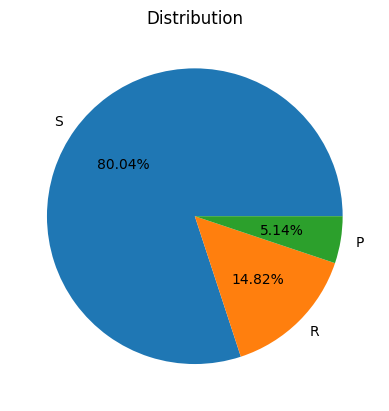

In [250]:
plt.pie(df['preference'].value_counts(), labels=df['preference'].value_counts().index,autopct="%0.2f%%")
plt.title('Distribution')
plt.show()

In [251]:
df = df[df['preference'] == 'S']

In [252]:
df.shape

(21938, 29)

# Observations


*   Flats for **Sale** are in majority(80 percent), for **Rental** purpose(~ 15 percent) and for **Sharing**(~ 5 percent)
*   No missing values





# **City**

In [282]:
df['city'].value_counts()

city
Gurgaon                   6581
Hyderabad                 3270
Kolkata South             2416
Kolkata East              1827
Navi Mumbai               1661
Kolkata North             1303
Central Mumbai suburbs    1150
Thane                      966
Mumbai Andheri-Dahisar     759
South Mumbai               455
Mumbai Beyond Thane        348
Mira Road And Beyond       268
Mumbai Harbour             253
Secunderabad               241
Kolkata West               198
Mumbai South West          175
Kolkata Central             53
Name: count, dtype: int64

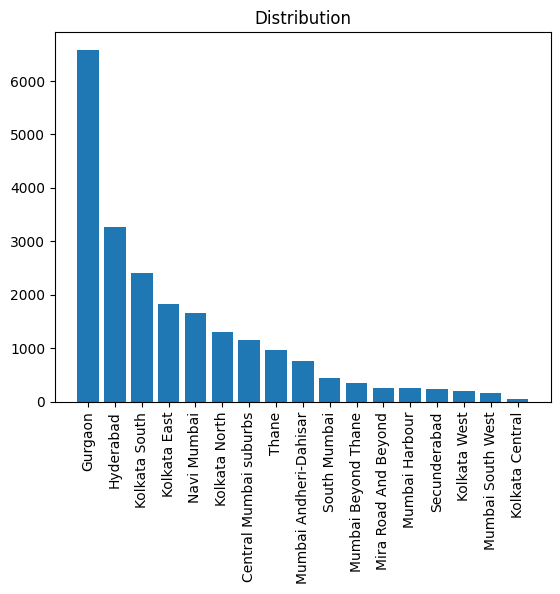

In [283]:
plt.bar(df['city'].value_counts().index,df['city'].value_counts())
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()

In [284]:
df['city'].isnull().sum()

0

# Oservation

*   Data contains majorly of 4 different cities(Gurgaon, Hyderabad, Kolkata & Mumbai) and rest are nearby cities or their sub-division.


*   Treating sub-divisions as a part of main city.


*   No missing values



# **Locality**

In [285]:
df['locality'].value_counts().shape

(1438,)

In [286]:
df['locality'].value_counts()

locality
New Town                    860
Rajarhat                    426
Mulund West                 323
Kondapur                    313
Tollygunge                  280
                           ... 
Anandapuri                    1
Thakurpukur 3A Bus Stand      1
Tob                           1
 Atlas More, Narendrapur      1
Satya Sai Enclave             1
Name: count, Length: 1438, dtype: int64

In [287]:
df['locality'].value_counts(normalize=True).cumsum().head(70)

locality
New Town       0.039232
Rajarhat       0.058665
Mulund West    0.073400
Kondapur       0.087678
Tollygunge     0.100452
                 ...   
Kestopur       0.486155
Chandivali     0.489850
Balkum         0.493499
Sector 61      0.497103
Sector 56      0.500661
Name: proportion, Length: 70, dtype: float64

In [288]:
locality_counts = df['locality'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very Very High (>500)": (locality_counts > 500).sum(),
    "Very High (250-500)": ((locality_counts >= 250) & (locality_counts <= 500)).sum(),
    "High (100-249)": ((locality_counts >= 100) & (locality_counts < 250)).sum(),
    "Average (50-99)": ((locality_counts >= 50) & (locality_counts < 100)).sum(),
    "Low(10-49)": ((locality_counts >= 10) & (locality_counts < 50)).sum(),
    "Very Low (2-9)": ((locality_counts > 1) & (locality_counts < 10)).sum(),
    "Very Very Low (1)": (locality_counts == 1).sum()
}
frequency_bins

{'Very Very High (>500)': 1,
 'Very High (250-500)': 6,
 'High (100-249)': 46,
 'Average (50-99)': 62,
 'Low(10-49)': 240,
 'Very Low (2-9)': 491,
 'Very Very Low (1)': 592}

<Axes: xlabel='locality'>

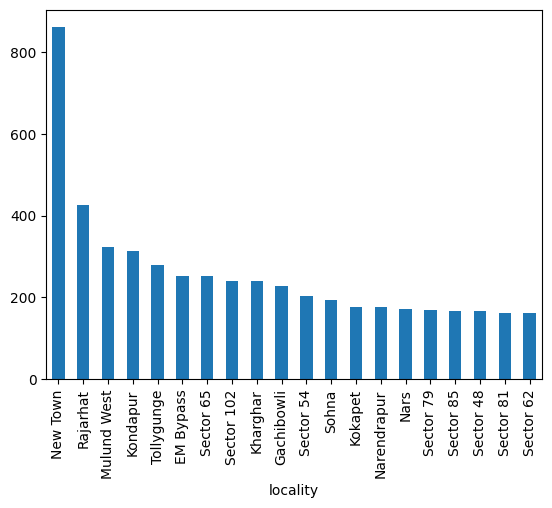

In [289]:
# top 20 loclities
df['locality'].value_counts().head(20).plot(kind='bar')

In [290]:
df['locality'].isnull().sum()

3

In [291]:
df[df['locality'].isnull()]

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,...,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,feature_score,luxury_score
6508,S,Check out this 4 bhk apartment for sale in new...,Gurgaon,NaN,new launch sector 66,Freehold,4.0,4.0,Unfurnished,North-West,...,NaN,0,0,0,0,0,0,0,7.00,7.23
6512,S,Navraj antalya is one of the most popular dest...,Gurgaon,NaN,navraj antalya,Freehold,4.0,4.0,Semifurnished,South-East,...,NaN,0,0,0,0,0,0,0,7.17,7.31
6514,S,Located in the popular residential address of ...,Gurgaon,NaN,Navraj 37D,Freehold,4.0,4.0,Semifurnished,North-West,...,NaN,0,0,0,0,0,0,0,7.00,7.29


# Observations

*   The top 70 localities have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 1379 localities.
*   There are 1439 localities.


*   Freequency distributuion of socities.
 * Very Very High (>500): Only 1 locality has more than 1000 listings.
 * Very High (250-500): 6 localities have between 300 to 600 listings.
 * High (100-249): 46 localities fall in this range with 100 to 299 listings each.
 * Average (50-99): 62 localities fall in this range with 50 to 99 listings
each.
 * Low (10-49): 240 localities have between 10 to 49 listings.
 * Very Low (2-9): 491 localities have between 2 to 9 listings.
 * Very Very Low (1): A significant number, 592 localities, have only 1 listing.


* 3 missing value






# **Property Name**

In [292]:
df['prop_name'].value_counts().shape

(6245,)

In [293]:
df['prop_name'].value_counts()

prop_name
On Request                        288
on request                        265
Emaar Digihomes                   110
Prestige High Fields              102
Sobha City                         89
                                 ... 
Ursa                                1
SB Apartment                        1
Albatross Co-operative Society      1
MTD-3                               1
Pavan Heights                       1
Name: count, Length: 6245, dtype: int64

In [294]:
df['prop_name'].value_counts(normalize=True).cumsum().head(430)

prop_name
On Request                  0.013136
on request                  0.025223
Emaar Digihomes             0.030241
Prestige High Fields        0.034893
Sobha City                  0.038953
                              ...   
Salcon The Verandas         0.498449
Whiteland Blissville        0.498951
Eternia by Oberoi Realty    0.499453
Sanctuary                   0.499954
Kanakia Zen World           0.500456
Name: proportion, Length: 430, dtype: float64

In [295]:
# Frequency distribution for propertys
property_counts = df['prop_name'].value_counts()

property_frequency_bins = {
    "Very High (>100)": (property_counts > 100).sum(),
    "High (50-100)": ((property_counts >= 50) & (property_counts <= 100)).sum(),
    "Average (10-49)": ((property_counts >= 10) & (property_counts < 50)).sum(),
    "Low (2-9)": ((property_counts > 1) & (property_counts < 10)).sum(),
    "Very Low (1)": (property_counts == 1).sum()
}

property_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 32,
 'Average (10-49)': 436,
 'Low (2-9)': 2004,
 'Very Low (1)': 3769}

In [104]:
df['prop_name'].isnull().sum()

0

# Observations


*   The top 430 Scociety have neraly 50 percent of the properties and the rest 50 percent of the properties come under the remaining 5817 socities.


*   There are 6245 socities.


*   Freequency distributuion of socities.
 *   Very High (>100): 4 socities have more than 100 listings.
 *   High (50-100): 32 socities have between 50 to 100 listings.
 *   Average (10-49): A majority, 436 socities, fall in this range with 10 to 49 listings each.
 *   Low (2-9): 2004 socities have between 2 to 9 listings.
 *   Very Low (1): Interestingly, there are 3770 socities with only 1 listing.

# **Price**

In [296]:
df.price_in_lakh.isnull().sum()

0

In [298]:
df.price_in_lakh.describe()

count    21924.000000
mean       222.864691
std        328.097032
min          5.000000
25%         70.000000
50%        140.000000
75%        250.000000
max       7000.000000
Name: price_in_lakh, dtype: float64

<Axes: xlabel='price_in_lakh', ylabel='Count'>

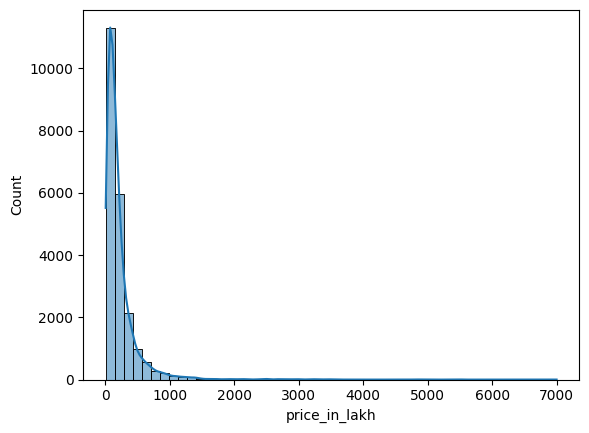

In [299]:
sns.histplot(df['price_in_lakh'], kde=True, bins=50)

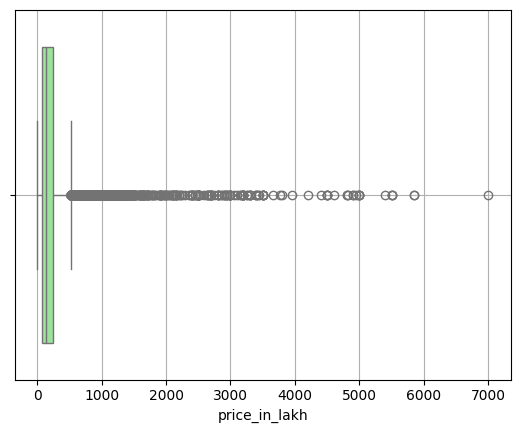

In [300]:
sns.boxplot(x=df['price_in_lakh'], color='lightgreen')
plt.grid()



*   Descriptive Statistics:
 *   Count: There are 21,924 non-missing price entries.
 *   Mean Price: The average price is approximately 2.22 crores.
 *   Median Price: The median (or 50th percentile) price is 1.4 crores.
 *   Standard Deviation: The prices have a standard deviation of 3.22, indicating variability in the prices.
 *   Range: Prices range from a minimum of 0.05 crores to a maximum of 70 crores.
 *   IQR: The interquartile range (difference between 25th and 75th percentile) is from 0.7 crores to 2.5 crores.

*   Visualizations:
 *   Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
 *   Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 40 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
*   Missing Values: There are 0 missing values in the price column.










In [301]:
# Skewness and Kurtosis
skewness = df['price_in_lakh'].skew()
kurtosis = df['price_in_lakh'].kurt()

print(skewness,kurtosis)

6.965741506708034 77.50338696462498


**Skewness**: The price distribution has a skewness of approximately 6.96, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 77.5. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [302]:
# Quantile Analysis
quantiles = df['price_in_lakh'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01      19.0
0.05      29.5
0.95     675.0
0.99    1400.0
Name: price_in_lakh, dtype: float64

# Quantile Analysis:


*   1% Quantile: Only 1% of properties are priced below 0.19 crores.
*   5% Quantile: 5% of properties are priced below 0.295 crores.
*   95% Quantile: 95% of properties are priced below 6.75 crores.
*   99% Quantile: 99% of properties are priced below 14 crores, indicating that very few properties are priced above this value.





In [303]:
# Identify potential outliers using IQR method
Q1 = df['price_in_lakh'].describe()['25%']
Q3 = df['price_in_lakh'].describe()['75%']
IQR = Q3 - Q1

IQR

180.0

In [304]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, '\n',upper_bound)

-200.0 
 520.0


In [305]:
outliers = df[(df['price_in_lakh'] < lower_bound) | (df['price_in_lakh'] > upper_bound)]
outliers.shape

(1767, 29)

In [306]:
outliers['price_in_lakh'].describe()

count    1767.000000
mean      996.092247
std       733.456766
min       521.000000
25%       606.000000
50%       750.000000
75%      1050.000000
max      7000.000000
Name: price_in_lakh, dtype: float64

# Outliers Analysis (using IQR method):

*   Based on the IQR method, there are 1771 properties considered as outliers.
*   These outliers have an average price of approximately 10.12 crores.
*   The range for these outliers is from 5.21 crores to 150 crores.




<Axes: xlabel='price_in_lakh'>

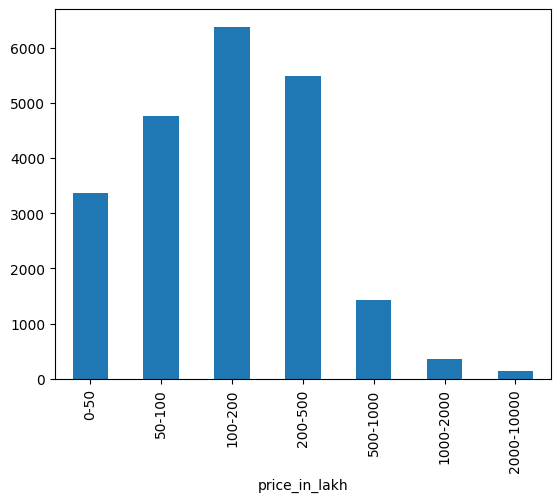

In [308]:
# price binning
bins = [0, 50, 100, 200, 500, 1000, 2000, 10000]
bin_labels = ["0-50", "50-100", "100-200", "200-500","500-1000", "1000-2000", "2000-10000"]
pd.cut(df['price_in_lakh'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')



*   The majority of properties are priced in the "1-2 crores" and "2-5 crores" ranges.
*   There's a significant drop in the number of properties priced above "5 crores."


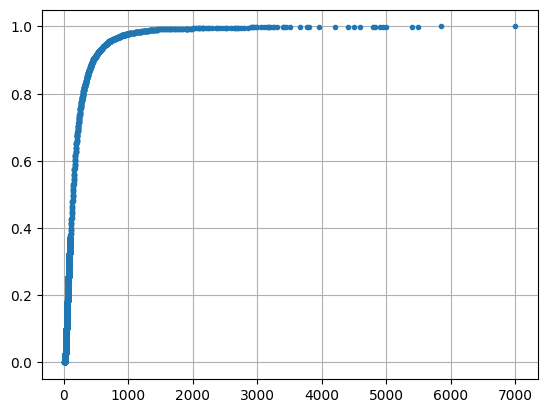

In [309]:
# ecdf plot
ecdf = df['price_in_lakh'].value_counts().sort_index().cumsum() / len(df['price_in_lakh'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

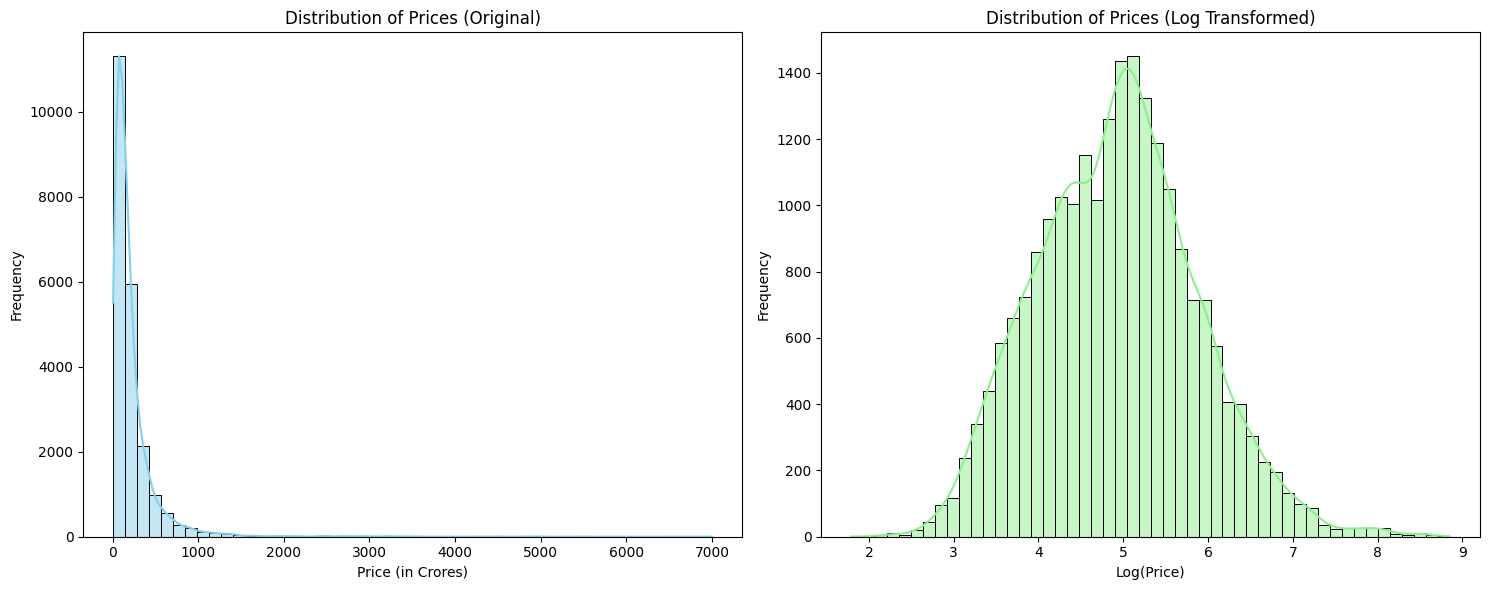

In [310]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price_in_lakh'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price_in_lakh']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



*   np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.
*   Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1



In [311]:
skewness = np.log1p(df['price_in_lakh']).skew()
kurtosis = np.log1p(df['price_in_lakh']).kurt()

print(skewness,kurtosis)

0.23320905668291167 0.08003378240540204


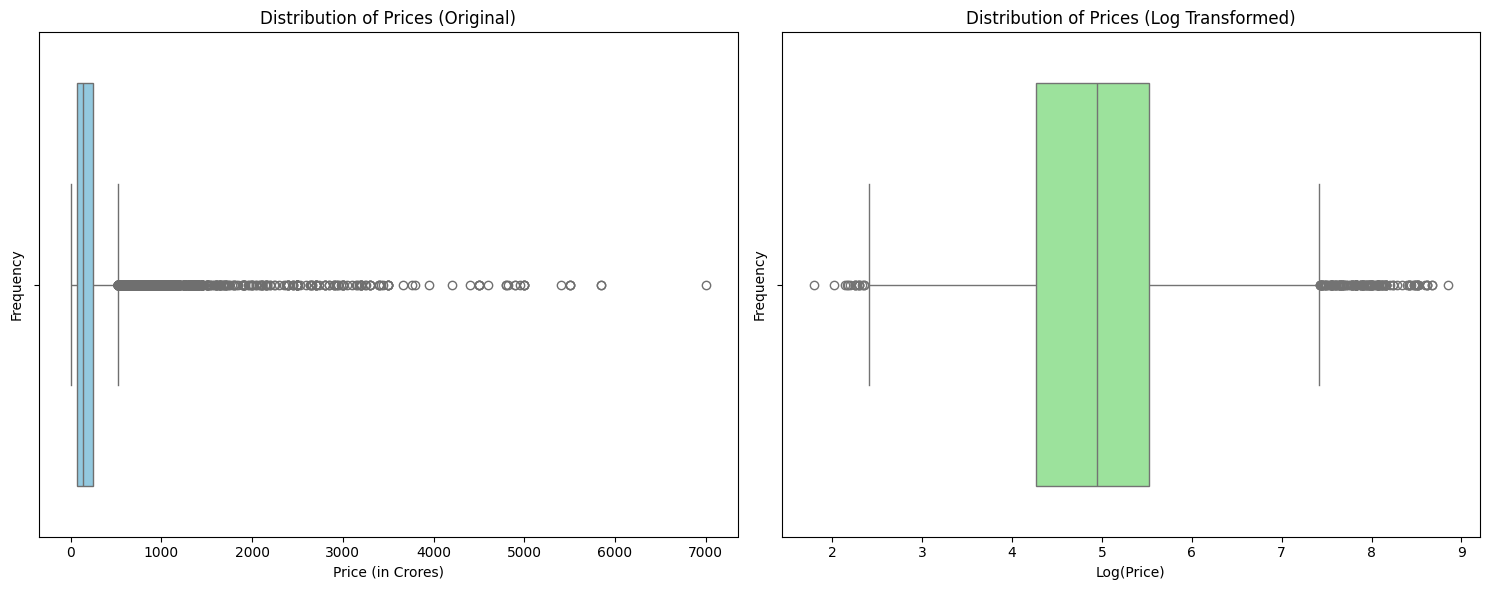

In [312]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price_in_lakh'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price_in_lakh']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Price/Sqft**

In [313]:
df['price_in_sqft'].isnull().sum()

0

In [314]:
df['price_in_sqft'].describe()

count     21924.000000
mean      14873.868135
std       18642.469369
min          93.000000
25%        6176.750000
50%       10000.000000
75%       17105.000000
max      449526.000000
Name: price_in_sqft, dtype: float64

<Axes: xlabel='price_in_sqft', ylabel='Count'>

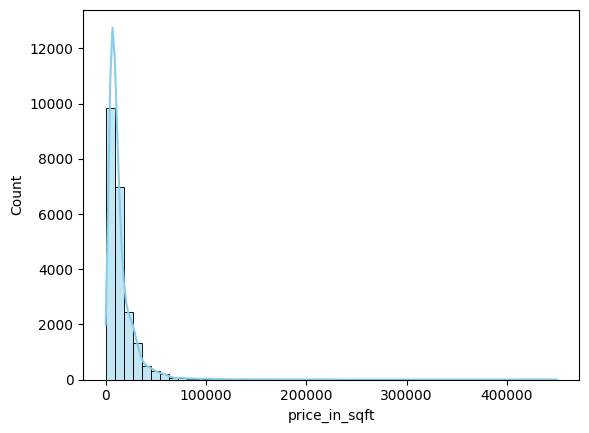

In [315]:
sns.histplot(df['price_in_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹50,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='price_in_sqft'>

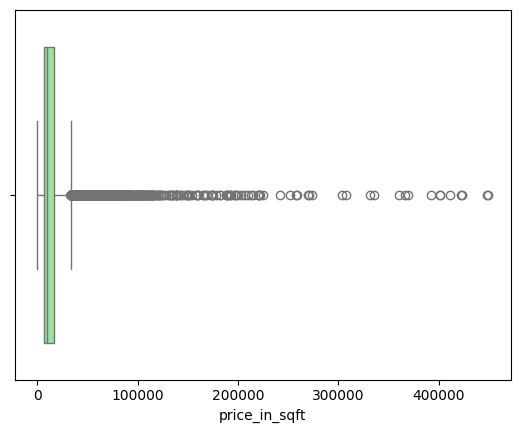

In [316]:
sns.boxplot(x=df['price_in_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers.

# Observations:


*   Potential Outliers.
*   Right Skewed.



# **#bedroom**

In [318]:
df['#bedroom'].isnull().sum()

12

<Axes: xlabel='#bedroom'>

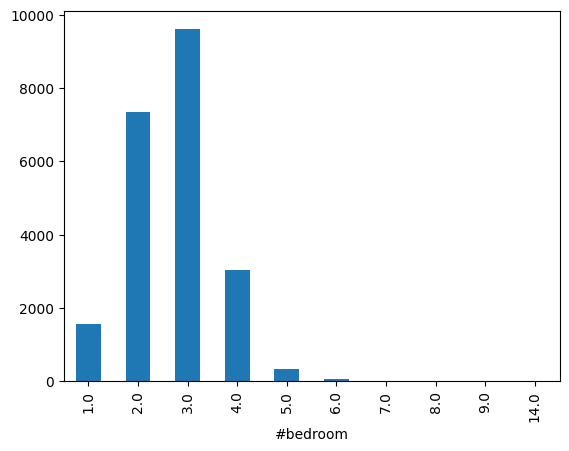

In [319]:
df['#bedroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

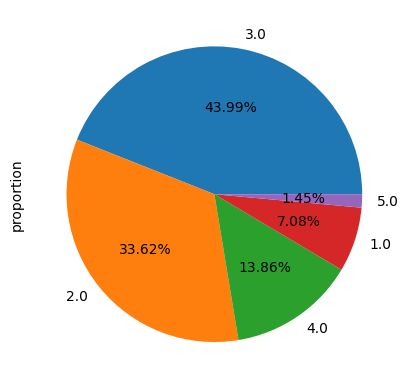

In [320]:
df['#bedroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# **#balcony**

In [321]:
df['#balcony'].isnull().sum()

5175

<Axes: xlabel='#balcony'>

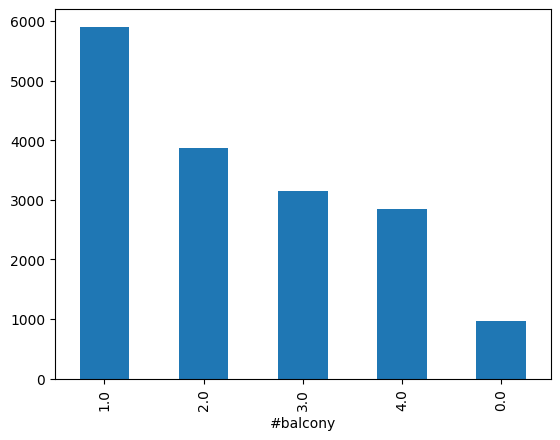

In [322]:
df['#balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

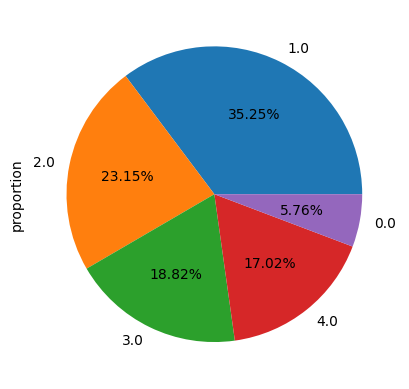

In [323]:
df['#balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# **floor_num**

In [162]:
df.iloc[:,10:].head()

,possesion_age,floor_num,#floors,area_in_sqft,price_in_sqft,price_in_lakh,transaction_type,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,feature_score,luxury_score
0,5-10 Year Old Property,14,26,3434,8766,263.0,1.0,28.406534,76.962792,10.0,0,1,0,2,1,4,0,7.38,7.45
1,1-5 Year Old Property,7,29,2870,21176,360.0,1.0,28.388907,76.951328,9.0,5,1,0,2,0,1,0,7.38,7.47
3,1-5 Year Old Property,14,28,2802,13740,385.0,1.0,28.518677,77.015115,8.0,3,2,0,2,0,1,0,7.62,7.42
5,1-5 Year Old Property,4,27,2290,8515,195.0,1.0,28.478440,76.986110,14.0,5,1,0,3,0,1,1,8.00,7.50
7,0-1 Year Old Property,12,30,1400,11571,162.0,1.0,28.416400,77.012620,13.0,4,1,0,2,0,1,1,7.71,7.43


In [163]:
df['floor_num'].isnull().sum()

0

In [324]:
df['floor_num'].describe()

count    21924.000000
mean         6.302408
std          6.890067
min         -2.000000
25%          1.000000
50%          4.000000
75%          9.000000
max         77.000000
Name: floor_num, dtype: float64

<Axes: xlabel='floor_num'>

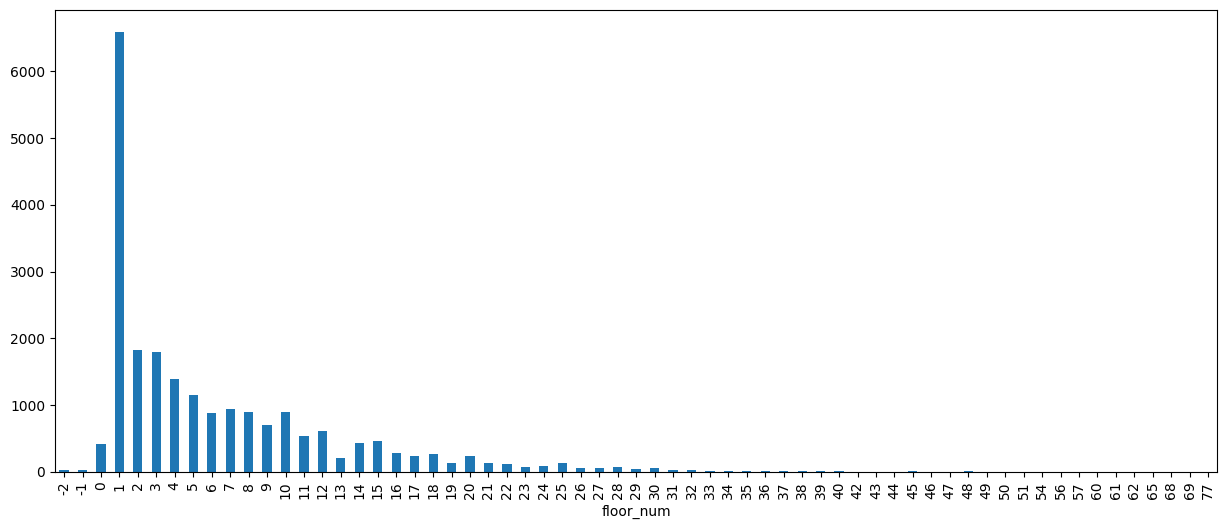

In [325]:
plt.figure(figsize=(15, 6))
df['floor_num'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floor_num'>

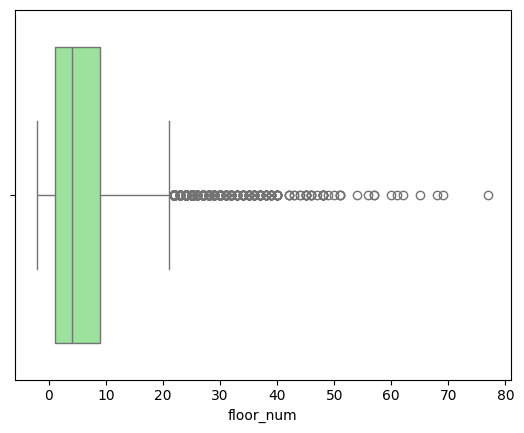

In [326]:
sns.boxplot(x=df['floor_num'], color='lightgreen')

# Observations:


*   The majority of the properties lie between the basement (-2) and the 20th floor.
*   Floors 1 to 3 are particularly common, with the 1st floor being the most frequent.
*   There are a few properties located at higher floors, but their frequency is much lower.
*   The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 1st and 9th floors.
*   Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.



# **facing**

In [327]:
df['facing'].isnull().sum()

7176

In [329]:
df['facing'].fillna('NA',inplace=True)

In [330]:
df['facing'].value_counts()

facing
NA            7176
East          4626
North-East    3348
West          1555
North         1498
South-East    1479
South         1062
South-West     625
North-West     555
Name: count, dtype: int64

<Axes: ylabel='proportion'>

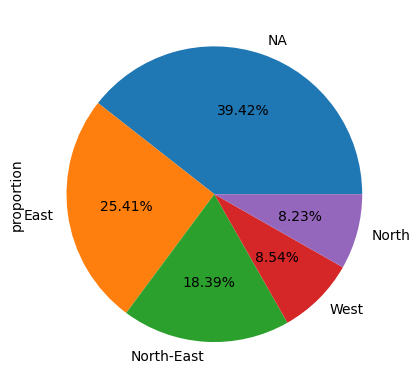

In [333]:
df['facing'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# **possesion_age**

In [331]:
df['possesion_age'].isnull().sum()

3

In [332]:
df['possesion_age'].value_counts()

possesion_age
Under Construction        7730
1-5 Year Old Property     6387
0-1 Year Old Property     3943
5-10 Year Old Property    2479
10+ Year Old Property     1382
Name: count, dtype: int64

<Axes: ylabel='proportion'>

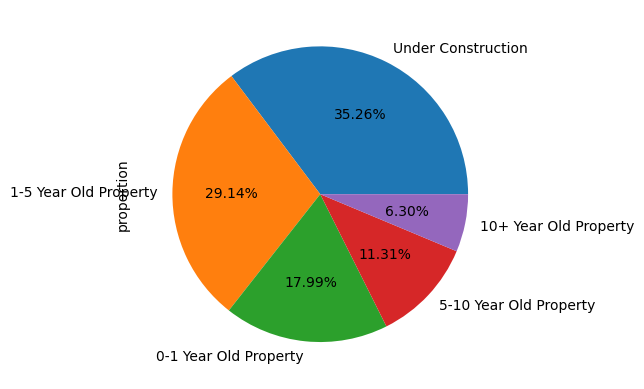

In [334]:
df['possesion_age'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# **Area**

In [335]:
# built up area
df['area_in_sqft'].isnull().sum()

0

In [336]:
df['area_in_sqft'].describe()

count    21924.000000
mean      1582.744162
std       1166.176478
min         90.000000
25%        900.000000
50%       1335.000000
75%       1950.000000
max      51557.000000
Name: area_in_sqft, dtype: float64

<Axes: xlabel='area_in_sqft', ylabel='Count'>

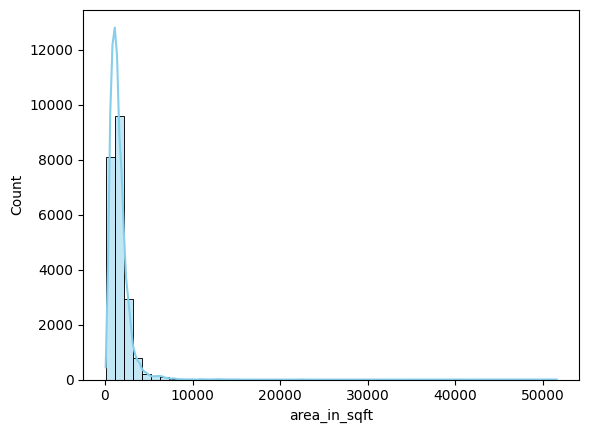

In [337]:
sns.histplot(df['area_in_sqft'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='area_in_sqft'>

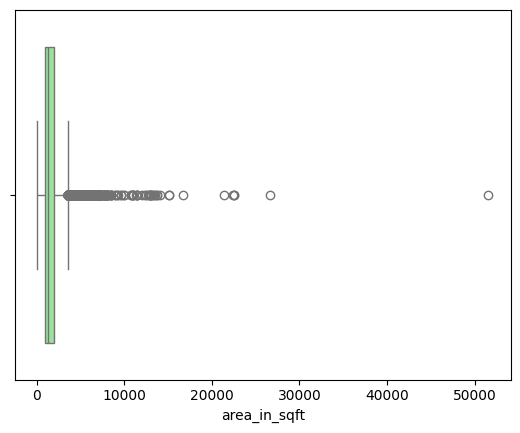

In [338]:
sns.boxplot(x=df['area_in_sqft'].dropna(), color='lightgreen')



*   Most properties have a built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
*   There are a few properties with a significantly larger area, leading to a right-skewed distribution.

*   The interquartile range (IQR) lies between roughly 900 sq.ft and 1,950 sq.ft, indicating that the middle 50% of the properties fall within this range.
*   There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large built-up area.





# **Nearby landmarks**

In [339]:
df.iloc[:5,19:]

,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,feature_score,luxury_score
0,10.0,0,1,0,2,1,4,0,7.38,7.45
1,9.0,5,1,0,2,0,1,0,7.38,7.47
3,8.0,3,2,0,2,0,1,0,7.62,7.42
5,14.0,5,1,0,3,0,1,1,8.00,7.50
7,13.0,4,1,0,2,0,1,1,7.71,7.43


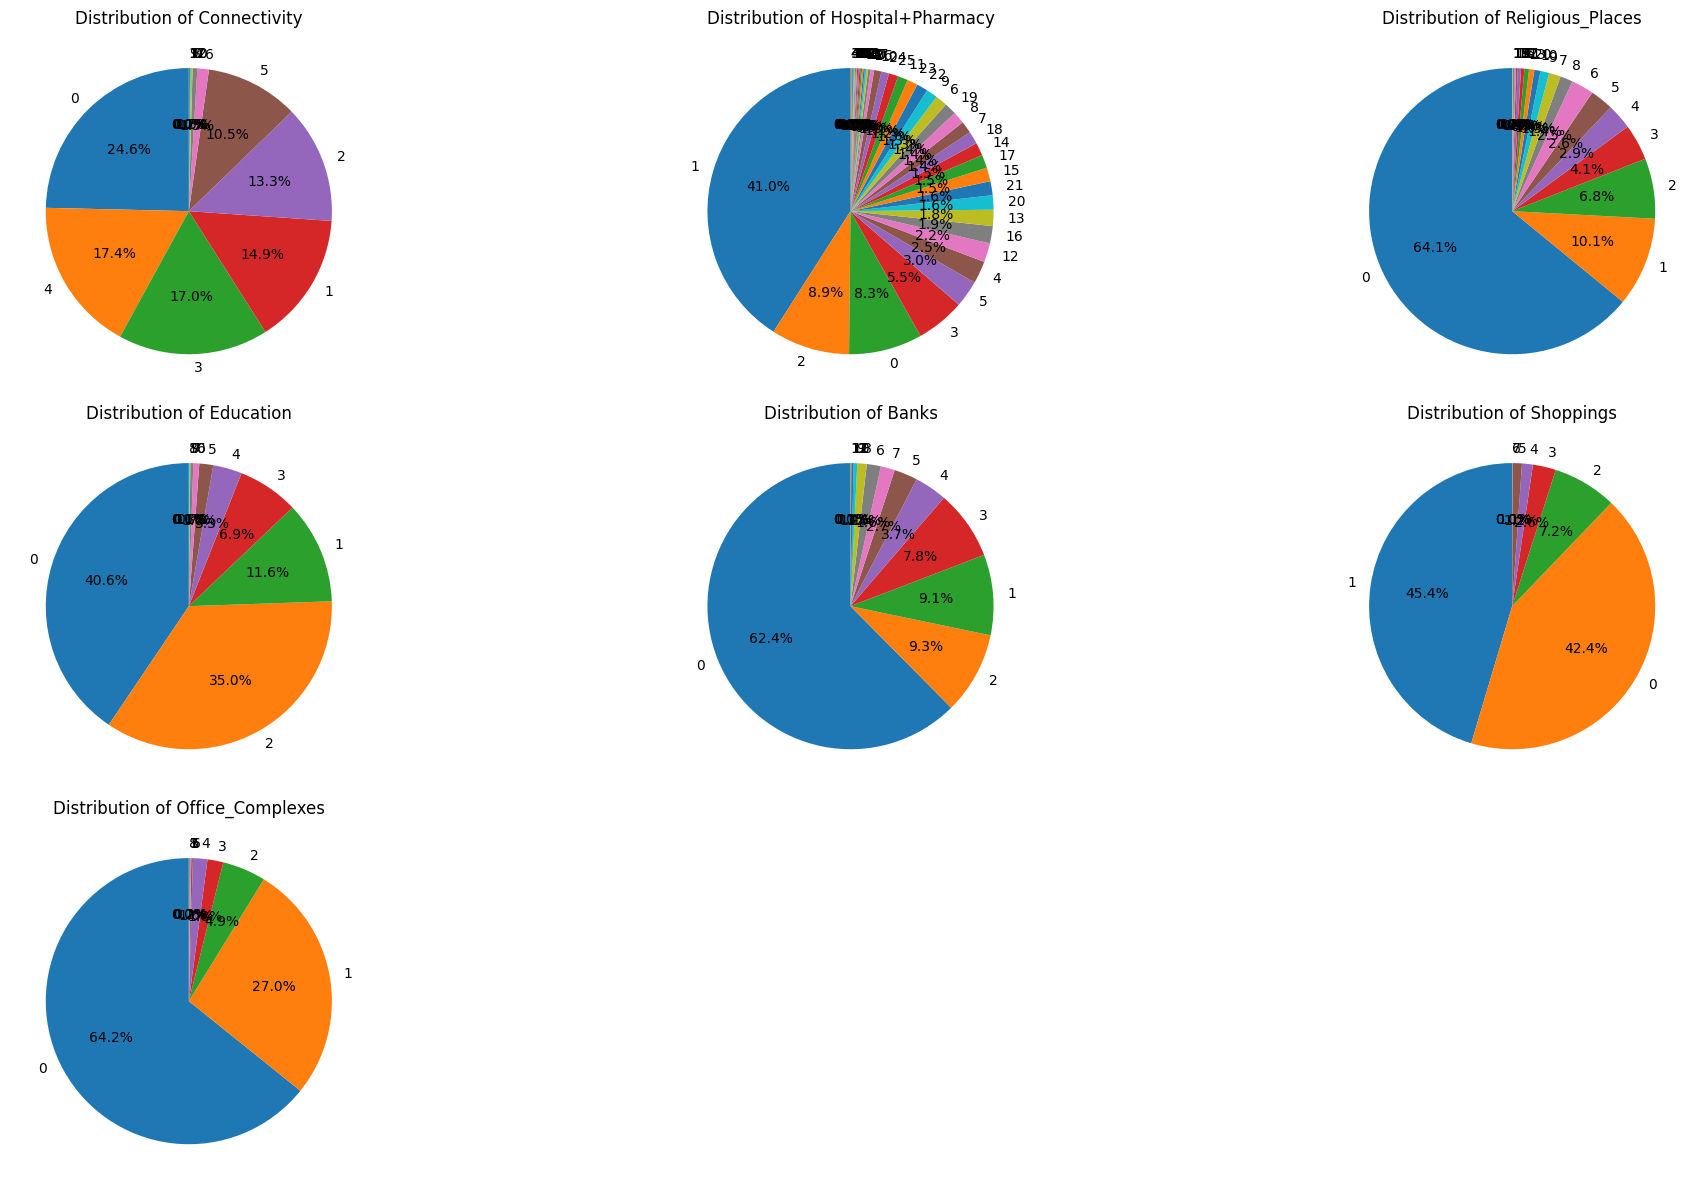

In [340]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['connectivity', 'hospital+pharmacy',	'religious_places',	'education',	'banks',	'shoppings',	'office_complexes'], 1):
    ax = plt.subplot(3, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# **furnishing_type**

In [341]:
df['furnish'].value_counts()

furnish
Unfurnished      8304
Semifurnished    6626
Furnished        1150
Name: count, dtype: int64

<Axes: ylabel='count'>

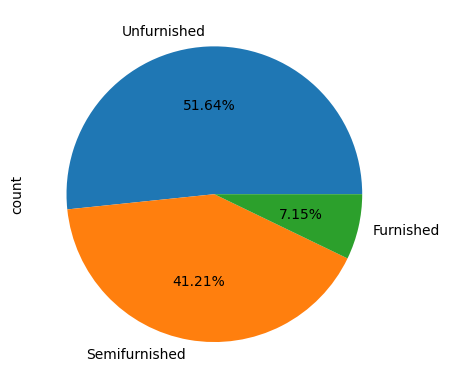

In [342]:
df['furnish'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# **luxury_score**

In [388]:
df.iloc[:,20:].head()

,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
0,0,1,0,2,1,4,0,82.0
1,5,1,0,2,0,1,0,112.0
2,3,2,0,2,0,1,0,89.0
3,5,1,0,3,0,1,1,75.0
4,4,1,0,2,0,1,1,52.0


In [389]:
df['luxury_score'].isnull().sum()

5469

In [390]:
df['luxury_score'].describe()

count    16453.000000
mean        74.483742
std         41.932134
min          0.000000
25%         43.000000
50%         72.000000
75%        108.000000
max        153.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

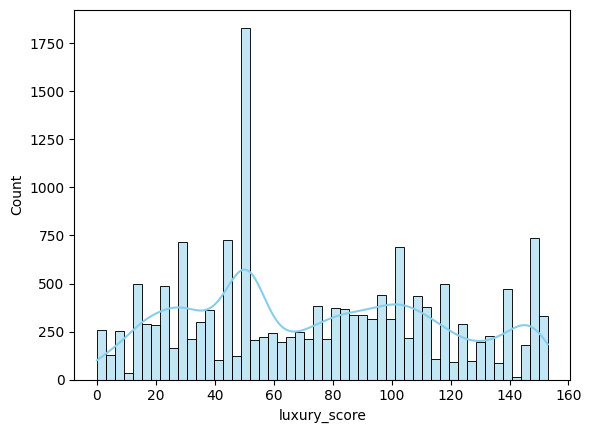

In [391]:
sns.histplot(df['luxury_score'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='luxury_score'>

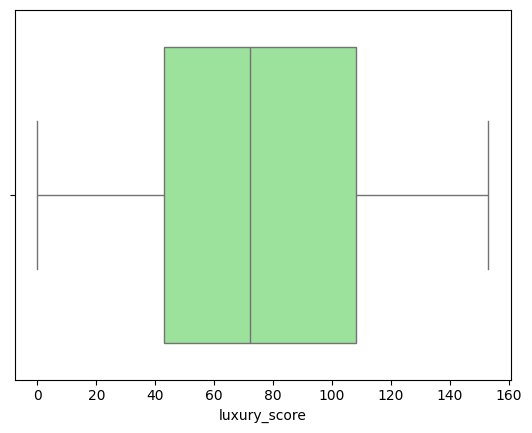

In [392]:
sns.boxplot(x=df['luxury_score'].dropna(), color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 50-60 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 40 and 110. The interquartile range (IQR) lies between these values.